In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,SpectralClustering
from scipy import linalg
import seaborn as sns; sns.set()
import re
import itertools

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

In [3]:
# Read it in
survey_64 = pd.read_csv('https://raw.githubusercontent.com/amos3vt/ASWW2/master/data/survey_64%20(1).csv')

In [4]:
no_float = [i for i in survey_64['T7'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]

In [5]:
embed = model.encode(no_unclear)
first = pd.DataFrame({'Response': no_unclear, 'Embedding': embed})
second = pd.DataFrame({'Response': no_unclear})

In [6]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x

In [7]:
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(second.iloc[:, 1:])
    Sum_of_squared_distances.append(km.inertia_)

In [8]:
second.iloc[:, 1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,0.169956,0.576175,0.305210,0.889021,-0.359807,-0.387795,0.933715,-0.641726,0.713522,-1.128619,...,-0.462090,0.065173,0.193122,-1.231526,-0.355753,0.271332,-0.025953,-0.001147,0.166827,0.423498
1,0.131383,-0.240392,0.872917,0.483824,-1.149685,0.287036,0.585074,-0.262572,0.772228,-0.179391,...,-0.049259,0.576768,1.236887,-0.686871,-0.362478,0.570970,-0.175608,-0.501856,-0.860414,0.394547
2,-0.336062,-0.347913,-0.215168,0.729264,-0.766587,-0.211024,0.488620,0.289371,0.190471,-0.612177,...,-0.478334,0.109539,0.124972,-2.683814,-0.385821,0.323180,-0.276944,0.872119,-0.232831,0.868794
3,-0.108661,0.008074,-0.312806,0.250400,-0.710667,-0.460732,0.253227,0.303874,0.448702,-0.627768,...,-0.856360,-0.827714,-0.220486,-1.702027,-0.264303,-0.171332,-0.294635,0.232948,0.300350,-0.145931
4,0.202234,0.478865,0.212403,-0.135441,0.298303,-0.182391,0.193854,-0.169043,0.185456,-0.668663,...,-0.031739,-0.189297,-0.570148,-0.848235,0.965863,0.025384,0.185035,-0.278375,-0.574916,0.006843
5,-0.088382,0.362954,0.284934,0.004831,0.489150,0.675873,0.365730,0.147547,-1.032685,-0.164218,...,-0.280511,-0.233706,0.458057,-0.528324,-0.216538,-0.058426,-0.146716,1.112407,-0.060235,0.184464
6,0.444734,0.014704,0.431642,-0.152115,0.407878,0.073410,0.911415,-0.294390,0.032836,-1.539492,...,-0.182933,0.317133,0.582221,-1.766440,-0.489173,0.677928,-0.363176,0.842360,-0.025921,0.091820
7,-0.048219,0.015311,0.859537,0.097289,-0.154143,-0.524913,0.606578,-0.546092,-0.103928,-0.572992,...,-0.243061,0.148650,0.171414,-1.614398,-0.501247,-0.233415,0.017473,1.201802,-0.454000,0.196047
8,-0.584153,0.048079,0.386686,0.028572,0.059856,-0.394835,0.778114,-0.391048,0.366425,-0.971533,...,-0.692479,-0.237202,0.108541,-1.284717,-0.818274,0.007424,-0.410522,0.423360,-0.880238,0.116402
9,-0.597591,0.101505,0.285013,0.979855,-0.230350,-0.274158,0.047768,-0.418555,-0.272099,-0.880474,...,-0.510752,0.290679,0.504492,-1.824323,-0.702003,0.242723,0.172776,0.900818,-0.199072,1.127029


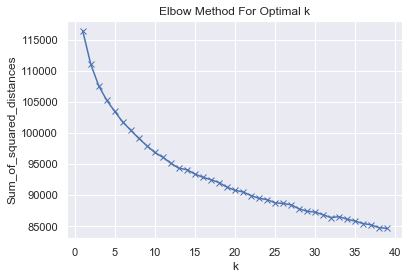

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
spectral = SpectralClustering(n_clusters=12,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())
first

,Response,Embedding,Cluster,bag
0,There is such a thing as prejudice in this arm...,"[0.16995625, 0.57617545, 0.30520982, 0.8890208...",3,"[there, is, such, a, thing, as, prejudice, in,..."
1,I'll like to go into combat and fight. That's ...,"[0.13138308, -0.2403918, 0.8729168, 0.48382372...",8,"[i'll, like, to, go, into, combat, and, fight...."
2,I think the army would be a lot better if the ...,"[-0.33606222, -0.34791282, -0.21516822, 0.7292...",8,"[i, think, the, army, would, be, a, lot, bette..."
3,I think some outfits get more breaks than othe...,"[-0.10866149, 0.008073718, -0.31280592, 0.2504...",8,"[i, think, some, outfits, get, more, breaks, t..."
4,As a quarter master outfit I feel like we shou...,"[0.20223399, 0.47886506, 0.2124034, -0.1354406...",1,"[as, a, quarter, master, outfit, i, feel, like..."
5,I have been in the army nine momts and have no...,"[-0.08838248, 0.36295375, 0.2849343, 0.0048312...",5,"[i, have, been, in, the, army, nine, momts, an..."
6,I think that when a man is inducted into the A...,"[0.4447335, 0.014703848, 0.43164206, -0.152114...",8,"[i, think, that, when, a, man, is, inducted, i..."
7,It takes too long to relieve a man when he is ...,"[-0.04821922, 0.015311183, 0.85953707, 0.09728...",8,"[it, takes, too, long, to, relieve, a, man, wh..."
8,There could be better arrangements made as to ...,"[-0.58415264, 0.048078883, 0.38668603, 0.02857...",8,"[there, could, be, better, arrangements, made,..."
9,"This Army is run by Officers who, as long as t...","[-0.59759074, 0.101505496, 0.2850132, 0.979855...",0,"[this, army, is, run, by, officers, who,, as, ..."


## TFIDF step

In [12]:
g = first.groupby('Cluster')
g.size().head()

Cluster
0    132
1     53
2     25
3     26
4     57
dtype: int64

In [13]:
pd.Series(first.bag[0]).value_counts()

that         3
we           3
the          2
one          2
thing        2
and          2
fighting     1
german       1
jew          1
we're        1
learn        1
damn         1
wop          1
prejudice    1
off          1
separate     1
as           1
dirty        1
to           1
united       1
hatred.      1
we'll        1
for          1
quicker      1
army         1
so           1
lousy        1
be.          1
all          1
there        1
stand        1
or           1
fall.        1
such         1
a            1
this         1
racist       1
in           1
cooperate    1
-            1
is           1
better       1
country      1
dtype: int64

In [14]:
TF = first.bag.apply(lambda bag : pd.Series(bag).value_counts())
TF

,that,we,the,one,thing,and,fighting,german,jew,we're,...,caste,democratic,supposedly,divides,chairs,[underline]men[/underline],enforced.,stupid,meets,"civilians,"
0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:

g = first.groupby('Cluster')
g.size()

Cluster
0     132
1      53
2      25
3      26
4      57
5      65
6      98
7      39
8     348
9      24
10     43
11     28
dtype: int64

In [16]:
clusters = g.bag.aggregate(lambda listofbags: list(itertools.chain.from_iterable(listofbags)))
clusters

Cluster
0     [this, army, is, run, by, officers, who,, as, ...
1     [as, a, quarter, master, outfit, i, feel, like...
2     [i, am, glad, i, am, in, the, army,, but, i, w...
3     [there, is, such, a, thing, as, prejudice, in,...
4     [as, long, as, an, em, at, camp, is, withing, ...
5     [i, have, been, in, the, army, nine, momts, an...
6     [i, think, that, this, outfit, that, we, are, ...
7     [officers, should, have, a, full, basic, train...
8     [i'll, like, to, go, into, combat, and, fight....
9     [i, could, do, better, out, of, the, army, tha...
10    [i, should, think, every, soldier, should, hav...
11    [at, this, time, there, is, little, i, can, ad...
Name: bag, dtype: object

In [17]:
TF = clusters.apply(lambda bag : pd.Series(bag).value_counts())
TF

,the,a,to,i,of,is,and,in,are,they,...,healthy,weaken.,survey,"survey,",exact,workers,"example,",dressed,"than,","add,"
Cluster,,,,,,,,,,,,,,,,,,,,,
0,376.0,176.0,165.0,161.0,154.0,144.0,127.0,126.0,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141.0,92.0,87.0,155.0,44.0,30.0,55.0,91.0,18.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.0,16.0,40.0,49.0,8.0,16.0,11.0,13.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92.0,28.0,59.0,15.0,24.0,21.0,37.0,38.0,22.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,98.0,86.0,105.0,28.0,28.0,55.0,45.0,19.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,172.0,85.0,95.0,155.0,59.0,62.0,105.0,72.0,44.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,306.0,161.0,178.0,118.0,111.0,141.0,120.0,116.0,75.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,106.0,84.0,70.0,83.0,51.0,27.0,50.0,66.0,24.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,852.0,547.0,586.0,509.0,422.0,286.0,391.0,445.0,213.0,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
IDF = np.log(len(TF)/TF.count())
IDF.sort_values()

the             0.000000
thing           0.000000
soldier         0.000000
you             0.000000
been            0.000000
my              0.000000
want            0.000000
when            0.000000
going           0.000000
way             0.000000
would           0.000000
no              0.000000
all             0.000000
some            0.000000
one             0.000000
more            0.000000
get             0.000000
better          0.000000
also            0.000000
which           0.000000
time            0.000000
just            0.000000
because         0.000000
work            0.000000
so              0.000000
if              0.000000
out             0.000000
could           0.000000
can             0.000000
little          0.000000
                  ...   
january.        2.484907
#96,            2.484907
dreadfully      2.484907
sistic          2.484907
pleasant.       2.484907
cure            2.484907
monthly,        2.484907
repair          2.484907
buy.            2.484907


In [19]:

TFIDF = TF * IDF
TFIDF

,the,a,to,i,of,is,and,in,are,they,...,healthy,weaken.,survey,"survey,",exact,workers,"example,",dressed,"than,","add,"
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
final = TFIDF.fillna(0)

In [21]:
np.argsort(np.array(final.loc[2]))[-4:]

array([1596, 2021, 1783, 2004])

In [22]:

np.argsort(np.array(final.loc[0]))[-4:]

array([ 93,  89, 135,  18])

In [24]:
(final.loc[:0].values.tolist())[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 24.327906486489862,
 0.0,
 0.0,
 4.611602980450374,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.5233299326992613,
 5.287325147024683,
 2.4363185557096316,
 4.740360476642819,
 0.0,
 2.1752844247407426,
 0.0,
 0.0,
 0.0,
 2.001261670761483,
 0.0,
 1.8272389167822236,
 3.8287526926730466,
 1.740227539792594,
 1.740227539792594,
 10.779930014653738,
 0.0,
 1.6532161628029642,
 0.0,
 1.5662047858133346,
 1.5662047858133346,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.3921820318340752,
 2.9171449087032735,
 2.9171449087032735,
 1.3921820318340752,
 0.0,
 0.0,
 2.734823351909319,
 0.0,
 1.2181592778548158,
 0.0,
 0.0,
 2.552501795115364,
 0.0,
 1.1311479008651861,
 0.0,
 1.1311479008651861,
 0.0,
 2.3701802383214097,
 2.187858681527455,
 0.0,
 3.4521848694213704,
 2.187858681527455,
 2.187858681527455,
 0.0,
 7.6246189861593985,
 12.08473517

### dataframe

In [25]:
listoflists = []
for i in range(0, 12):
    listoflists.append([final.loc[i].index[j] for j in np.argsort(np.array(final.loc[i]))[-4:]])

In [26]:
[(final.loc[:8].values.tolist())[0][j] for j in list(np.argsort(np.array(final.loc[:8].values.tolist())[0])[-4:])]


[12.084735175349207,
 12.084735175349207,
 12.542316284596385,
 24.327906486489862]

In [27]:
dictionary = pd.DataFrame({'Cluster': range(0, 12), 'Individual Dictionary': listoflists})

In [28]:
dictionary


,Cluster,Individual Dictionary
0,0,"[treated, non-coms, dislike, officers]"
1,1,"[driver., air, medical, corps]"
2,2,"[end, soon, over., glad]"
3,3,"[win, germany, jews., john]"
4,4,"[family, wife, seeing, married]"
5,5,"[wife, support, mother, she]"
6,6,"[cooks, meals, mess, food]"
7,7,"[school., cadets, schools, airplane]"
8,8,"[hours, at, service, schools]"
9,9,"[cooks, liberty, grapefruit, food]"
